In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
import glob
import json
import os

import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
import glob
import json
import os
import torch
import torch.nn as nn
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, sampler
import pandas as pd
import copy

In [2]:
pix_2_pix_imgs = "/mnt/tank/scratch/nduginets/pix2pix_result/label2skin/test_latest/images"

pix_2_pix_boxed_imgs = "/mnt/tank/scratch/nduginets/pix2pix_result_boxed/label2skin/test_latest/images"


In [9]:
pix_2_pix_imgs_lst = sorted(glob.glob(pix_2_pix_imgs + "/*"))
pix_2_pix_boxed_imgs_lst = sorted(glob.glob(pix_2_pix_boxed_imgs + "/*"))

assert len(pix_2_pix_imgs_lst) == len(pix_2_pix_boxed_imgs_lst)

cnt = len(pix_2_pix_imgs_lst) / 2

In [31]:
pix_2_pix_boxed_imgs_lst[0:5]

['/mnt/tank/scratch/nduginets/pix2pix_result_boxed/label2skin/test_latest/images/ISIC_0000000_semantic_input_label.jpg',
 '/mnt/tank/scratch/nduginets/pix2pix_result_boxed/label2skin/test_latest/images/ISIC_0000000_semantic_synthesized_image.jpg',
 '/mnt/tank/scratch/nduginets/pix2pix_result_boxed/label2skin/test_latest/images/ISIC_0000001_semantic_input_label.jpg',
 '/mnt/tank/scratch/nduginets/pix2pix_result_boxed/label2skin/test_latest/images/ISIC_0000001_semantic_synthesized_image.jpg',
 '/mnt/tank/scratch/nduginets/pix2pix_result_boxed/label2skin/test_latest/images/ISIC_0000003_semantic_input_label.jpg']

<Figure size 432x288 with 0 Axes>

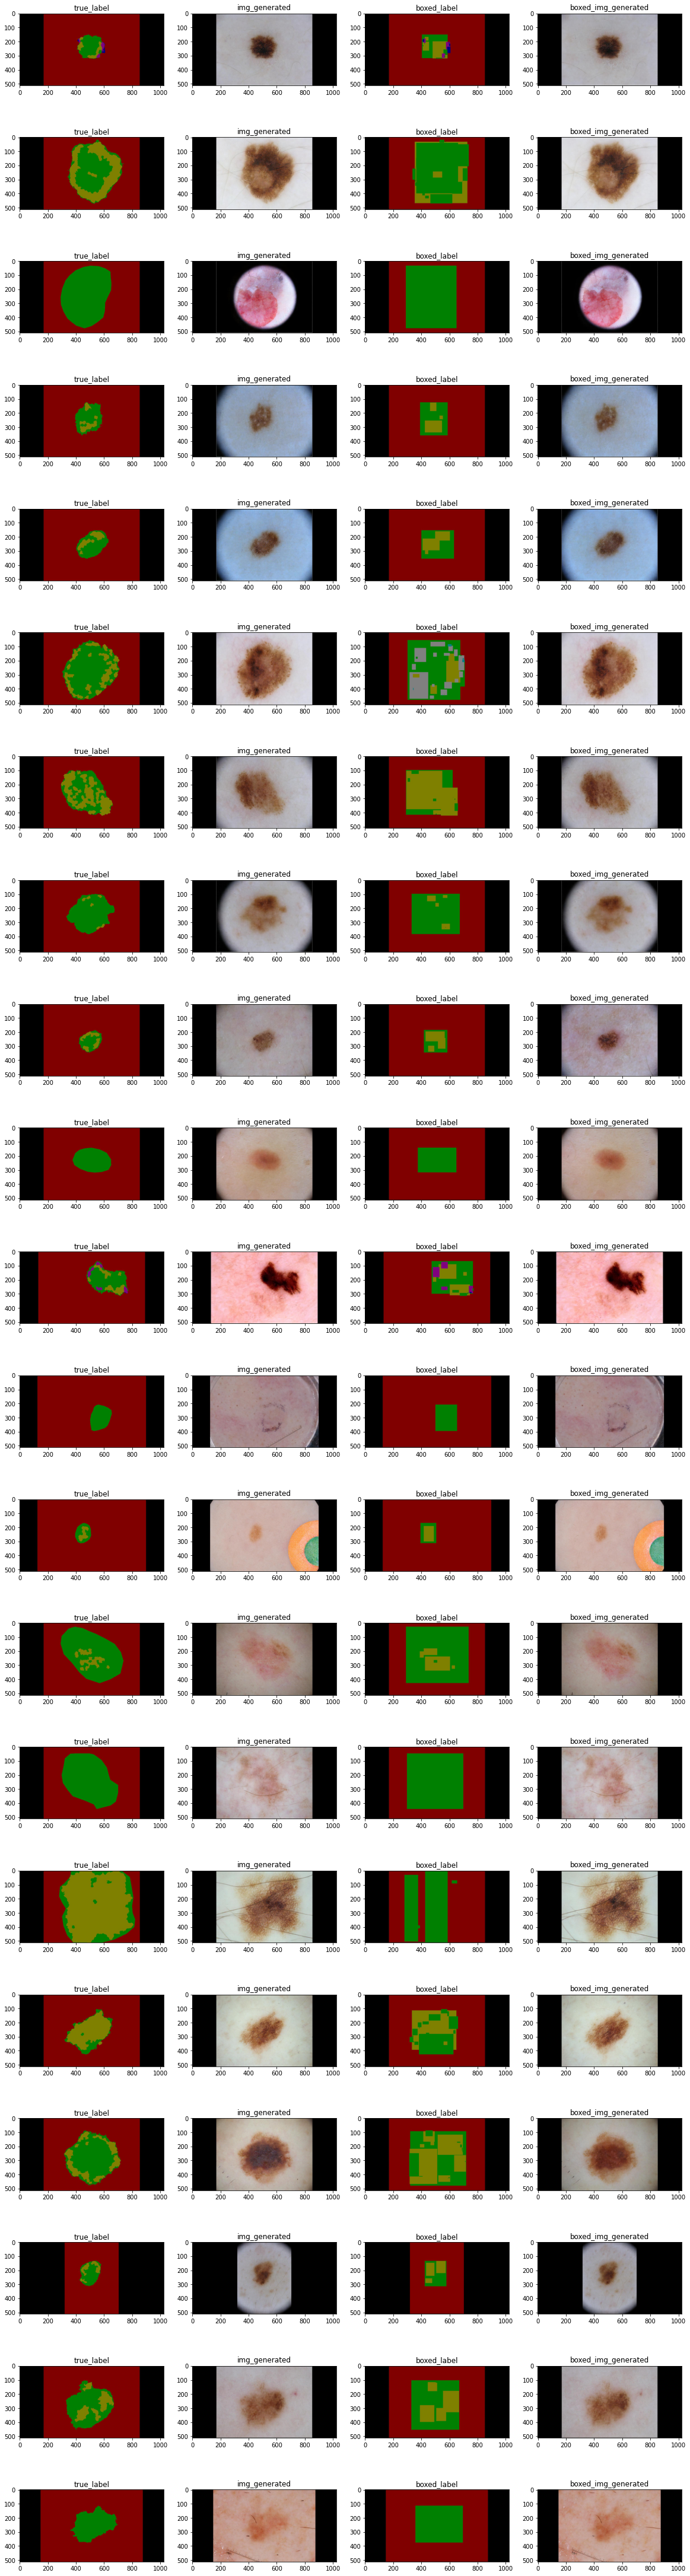

In [23]:
indexes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 100, 150, 1234, 555, 666, 777, 888, 909, 900, 228, 50, 431]
print(indexes)
plt.clf()
fig, plots = plt.subplots(nrows=len(indexes), ncols=4, figsize = (20,80))
for i, index in enumerate(indexes):
    offset_input_label = pix_2_pix_imgs_lst[index * 2]
    offset_image = pix_2_pix_imgs_lst[index * 2 + 1]

    boxed_offset_input_label = pix_2_pix_boxed_imgs_lst[index * 2]
    boxed_offset_image = pix_2_pix_boxed_imgs_lst[index * 2 + 1]
    
    array = [offset_input_label, offset_image, boxed_offset_input_label, boxed_offset_image]
    lbls = ["true_label", "img_generated", "boxed_label", "boxed_img_generated"]
    for j, image in enumerate(array):
        img = mpimg.imread(image)
        plots[i][j].imshow(img)
        plots[i][j].set_title(lbls[j])

plt.show()
    
    

<Figure size 432x288 with 0 Axes>

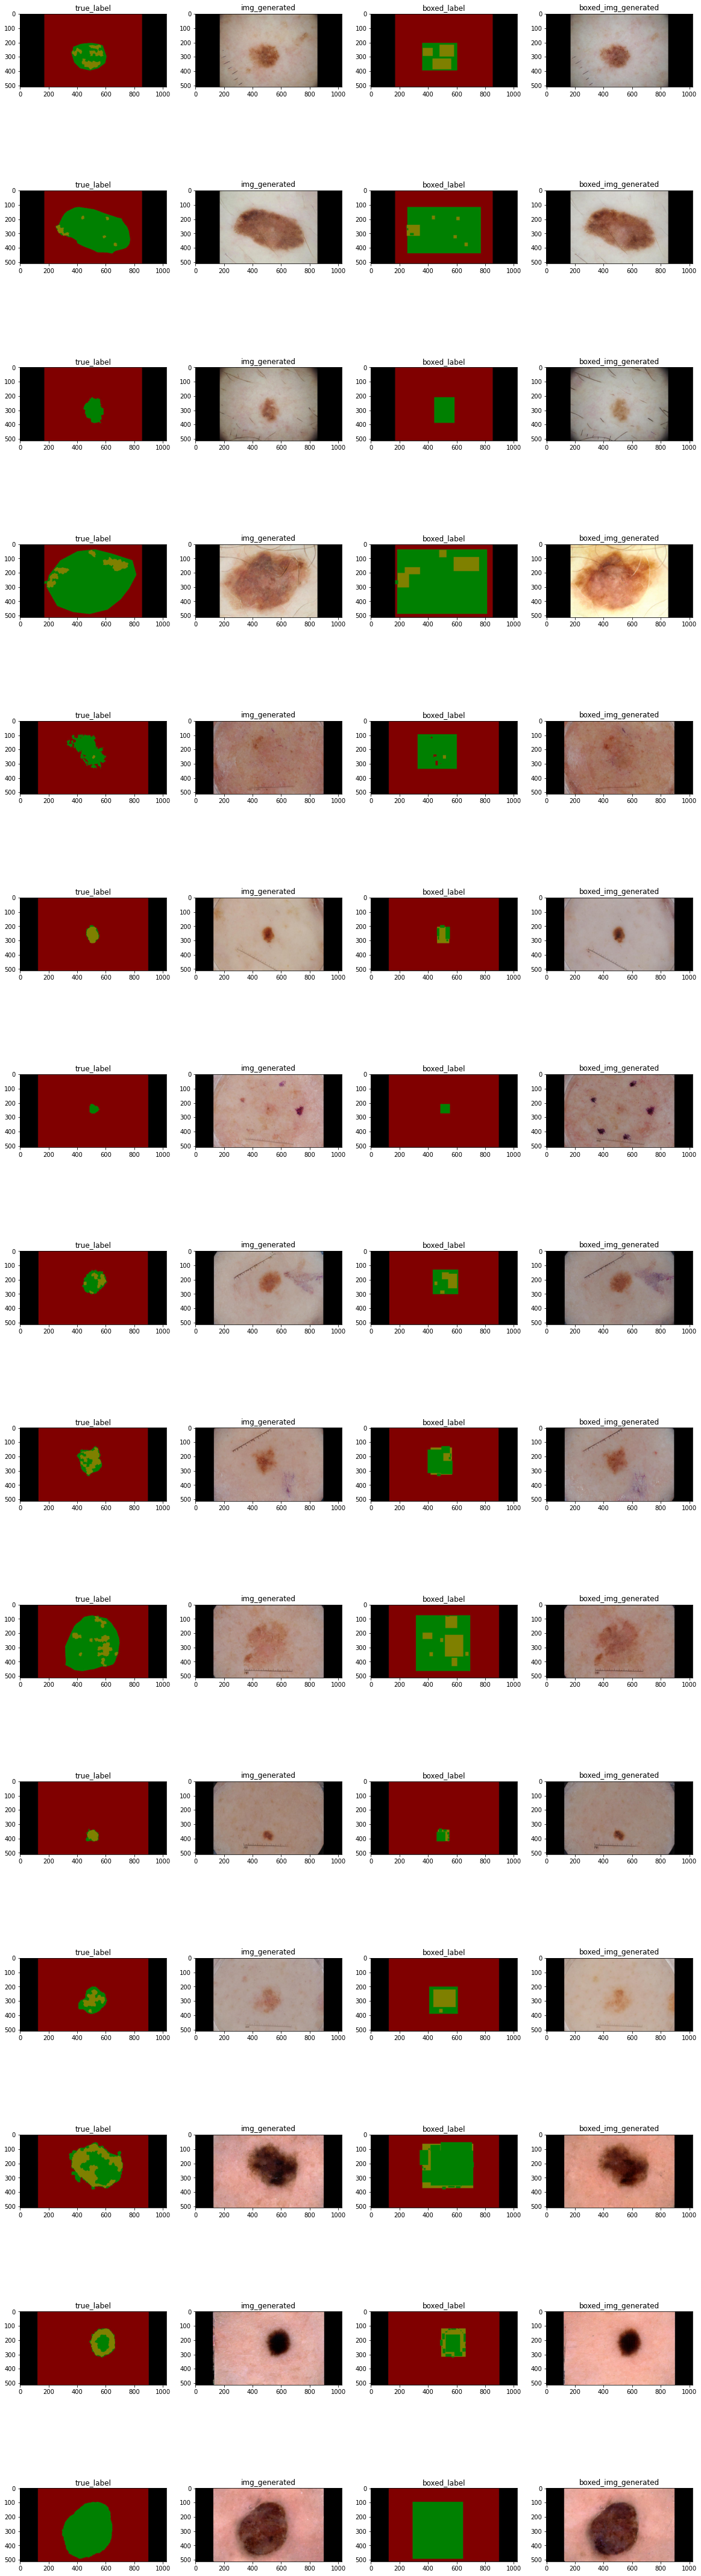

In [37]:

frame = pd.read_csv("/nfs/home/nduginets/master-diploma/splits_boxed/validation_skin_lesion.csv")
data = list(map(lambda x: x.split("/")[-1][:-4], frame['images']))
sub_data = data[0: 15]

def filter_out(items, dataset):
    result = []
    for i in dataset:
        for j in items:
            if j in i:
                result.append(i)
                break
    return result

images_to_draw = filter_out(sub_data, pix_2_pix_imgs_lst)

boxed_images_to_draw = filter_out(sub_data, pix_2_pix_boxed_imgs_lst)

cnt = len(boxed_images_to_draw) // 2
assert len(images_to_draw) == len(boxed_images_to_draw)


plt.clf()
fig, plots = plt.subplots(nrows=cnt, ncols=4, figsize = (20,80))
for i in range(cnt):
    offset_input_label = images_to_draw[i * 2]
    offset_image = images_to_draw[i * 2 + 1]

    boxed_offset_input_label = boxed_images_to_draw[i * 2]
    boxed_offset_image = boxed_images_to_draw[i * 2 + 1]
    
    array = [offset_input_label, offset_image, boxed_offset_input_label, boxed_offset_image]
    lbls = ["true_label", "img_generated", "boxed_label", "boxed_img_generated"]
    for j, image in enumerate(array):
        img = mpimg.imread(image)
        plots[i][j].imshow(img)
        plots[i][j].set_title(lbls[j])

plt.show()